# Exploratory Data Analysis

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

## Loading the raw data

In [31]:
raw_data = pd.read_csv("./../data/0_raw/data.csv", sep=";")

In [23]:
raw_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Train - test split

In [24]:
y = raw_data['Target']
X = raw_data.drop('Target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    stratify=y,
                                                    random_state=42)

Let's do a sanity check

In [32]:
assert X_train.shape[0] == y_train.shape[0] and X_test.shape[0] == y_test.shape[0] and X_train.shape[1] == X_test.shape[1] 

## Save the split data for later use

In [27]:
train = X_train
train['Target'] = y_train

test = X_test
test['Target'] = y_test

train.to_csv("./../data/1_interim/train.csv", index=False)
test.to_csv("./../data/1_interim/test.csv", index=False)

## Loading the training data

In [28]:
train = pd.read_csv("./../data/1_interim/train.csv")

In [29]:
train.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,43,1,9238,1,39,120.0,1,2,1,...,6,10,13,10,11.800000,0,13.9,-0.3,0.79,Graduate
1,1,39,1,9130,1,1,133.1,1,1,1,...,0,5,5,0,0.000000,5,12.7,3.7,-1.70,Dropout
2,1,44,1,9003,1,39,140.0,1,1,38,...,0,6,15,4,10.500000,0,15.5,2.8,-4.06,Enrolled
3,1,16,1,9070,1,1,125.0,1,1,1,...,0,6,6,6,12.833333,0,12.4,0.5,1.79,Graduate
4,1,17,1,9500,1,1,142.0,1,37,37,...,0,8,8,7,14.731429,0,10.8,1.4,1.74,Graduate


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3539 non-null   int64  
 1   Application mode                                3539 non-null   int64  
 2   Application order                               3539 non-null   int64  
 3   Course                                          3539 non-null   int64  
 4   Daytime/evening attendance	                     3539 non-null   int64  
 5   Previous qualification                          3539 non-null   int64  
 6   Previous qualification (grade)                  3539 non-null   float64
 7   Nacionality                                     3539 non-null   int64  
 8   Mother's qualification                          3539 non-null   int64  
 9   Father's qualification                   

In [34]:
train.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

## Target

In [103]:
def plot_counts(df, column, figsize = (4, 4)):
    plt.figure(figsize=figsize)
    sns.countplot(data=df, x = column, palette='viridis')
    plt.xlabel(column)
    plt.show()

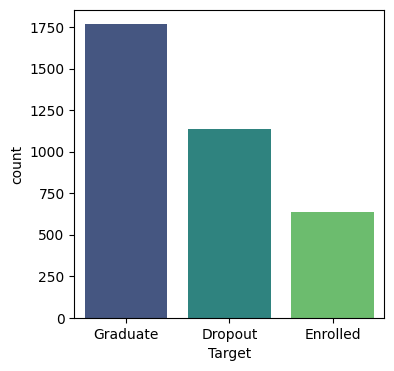

In [104]:
plot_counts(train, 'Target')

In [42]:
dropout_rate = (train['Target'] == 'Dropout').sum() / train.shape[0]
enrolled_rate = (train['Target'] == 'Enrolled').sum() / train.shape[0]
graduation_rate = (train['Target'] == 'Graduate').sum() / train.shape[0]

In [43]:
print("Fraction of students dropped out: ", dropout_rate)
print("Fraction of students still enrolled: ", enrolled_rate)
print("Fraction of students graduated: ", graduation_rate)

Fraction of students dropped out:  0.3212771969482905
Fraction of students still enrolled:  0.17942921729302064
Fraction of students graduated:  0.4992935857586889


32% of all students drop out of their courses and about 18% takes more time than the normal duration of their course to graduate.

## Available features

In [44]:
train.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

## Demographic features

The following are the demographic features in the dataset: age at enrollment, gender, marital status, nationality, and  special needs.

### Gender

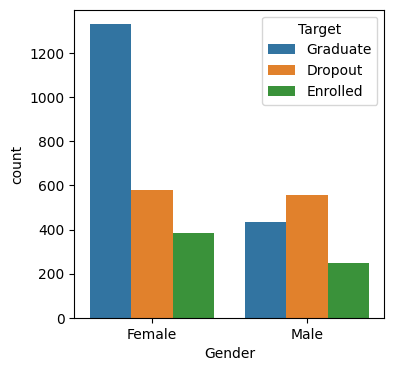

In [127]:
plt.figure(figsize=(4,4))
sns.countplot(data=train, x='Gender', hue='Target')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

Female students seems to be more likely to graduate. 

### Age at enrollment

<Figure size 400x400 with 0 Axes>

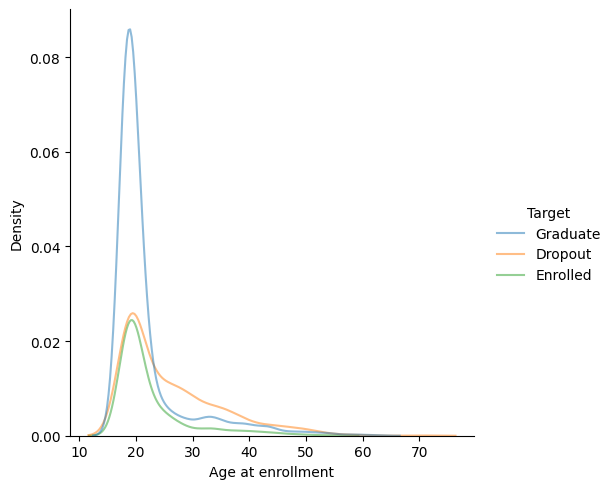

In [211]:
plt.figure(figsize=(4,4))
sns.displot(data=train, x='Age at enrollment', hue='Target', kind='kde', alpha = 0.5)
plt.show()

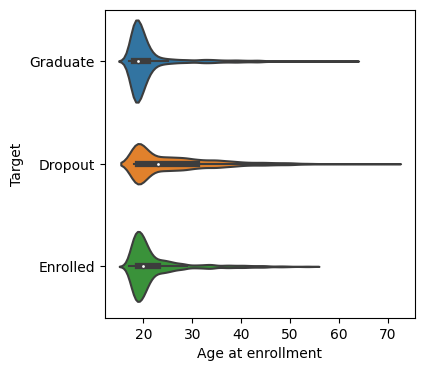

In [215]:
plt.figure(figsize=(4,4))
sns.violinplot(data=train, x='Age at enrollment', y='Target', bw=0.15)
plt.show()

Age distribution of dropout category have a thicker tail. The distributions of the other two groups seems to overlap considerably.

### Marital Status

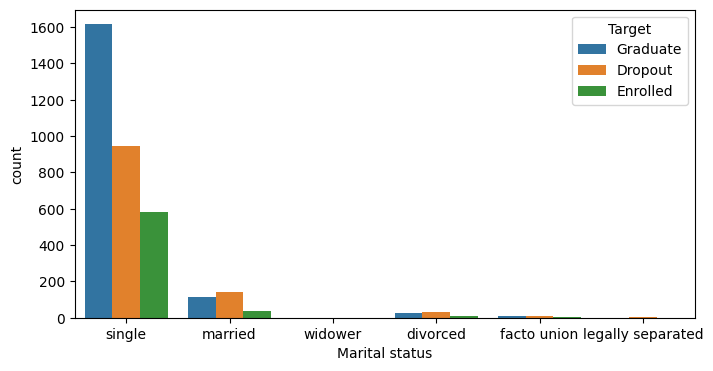

In [148]:
plt.figure(figsize=(8,4))
sns.countplot(data=train, x='Marital status', hue='Target')
plt.xticks(ticks=range(6), labels=['single', 'married', 'widower', 'divorced', 'facto union', 'legally separated'])
plt.show()

Let's take a closer look at the numbers

In [191]:
train[['Marital status', 'Target']].groupby(by = ['Marital status', 'Target']).value_counts()

Marital status  Target  
1               Dropout      948
                Enrolled     581
                Graduate    1615
2               Dropout      144
                Enrolled      38
                Graduate     114
3               Dropout        1
                Enrolled       1
                Graduate       1
4               Dropout       33
                Enrolled      12
                Graduate      28
5               Dropout        8
                Enrolled       2
                Graduate       9
6               Dropout        3
                Enrolled       1
dtype: int64

There is a higher percentage of dropouts among non-single students

### Nationality

There are three features related to nationality.
* Nacionality(Portugese for nationality)
* International (Whether a student is an international student)
* Displaced(Likely referring to refugees)

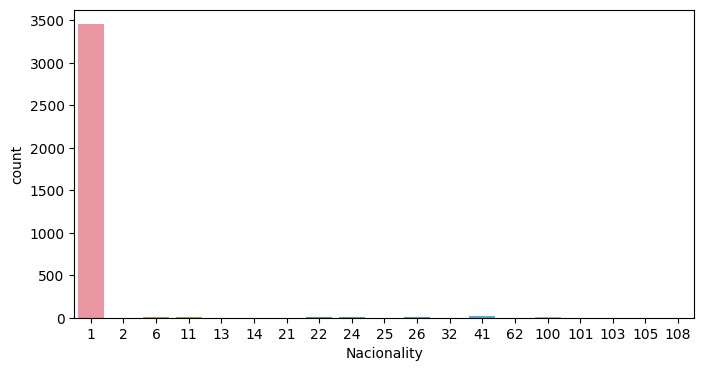

In [194]:
plt.figure(figsize=(8,4))
sns.countplot(data=train, x='Nacionality')
#plt.xticks(ticks=range(6), labels=1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian)
plt.show()

In [219]:
num_non_portugese = train[train['Nacionality'] != 1]['Nacionality'].shape[0]
print(f"There are {num_non_portugese} Non - Portugese students")

There are 86 Non - Portugese students


In [222]:
num_non_portugese = train['International'].value_counts()
print(f"There are {num_non_portugese[1]} Non - Portugese students")

There are 86 Non - Portugese students


Two features are consistent

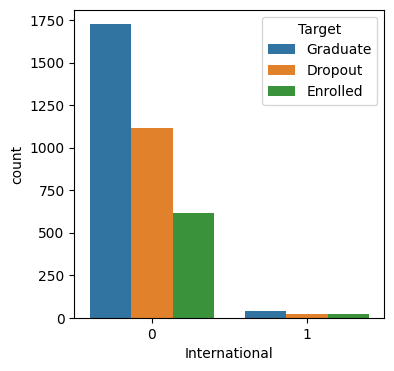

In [209]:
plt.figure(figsize=(4,4))
sns.countplot(data=train, x='International', hue='Target')
plt.show()

There are only 86 student who are not from Portugal. Therefore this feature wouldn't have much effect in modelling.

### Displaced

This feature likely indicates non-local students. Need further clarity.

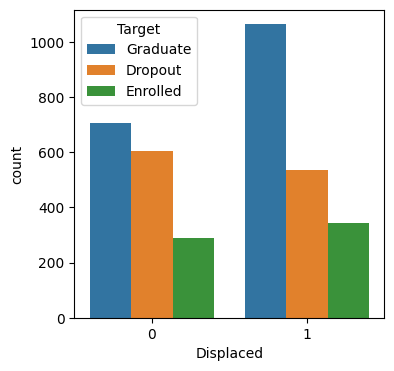

In [224]:
plt.figure(figsize=(4,4))
sns.countplot(data=train, x='Displaced', hue='Target')
plt.show()

### Educational Special Needs

In [231]:
counts = train['Educational special needs'].value_counts()
print(f"There are {counts[1]} student who had educational special needs out of total {counts.sum()}")

There are 41 student who had educational special needs out of total 3539


## Socio-Economic Features

The socio-economic factors include parents' qualifications and occupations, debt, fee payment status, unemployment rate, inflation rate and GDP.

### Parent's Qualification

In [234]:
train["Father\'s qualification"].nunique()

32

In [49]:
num_features = ["Admission grade", "Previous qualification (grade)", "GDP", "Unemployment rate", "Age at enrollment", "Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)"]
cat_features = ["Marital status", "Application mode", "Application order", "Course",
       "Daytime/evening attendance\t", "Previous qualification", "Nacionality",
       "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation", "Admission grade",
       "Displaced", "Educational special needs", "Debtor",
       "Tuition fees up to date", "Gender", "Scholarship holder", 'International',
       "Curricular units 1st sem (credited)",
       "Curricular units 1st sem (enrolled)",
       "Curricular units 1st sem (evaluations)",
       "Curricular units 1st sem (approved)",
       "Curricular units 1st sem (without evaluations)",
       "Curricular units 2nd sem (credited)",
       "Curricular units 2nd sem (enrolled)",
       "Curricular units 2nd sem (evaluations)",
       "Curricular units 2nd sem (approved)",
       "Curricular units 2nd sem (without evaluations)"]

In [50]:
len(num_features), len(cat_features)

(7, 29)

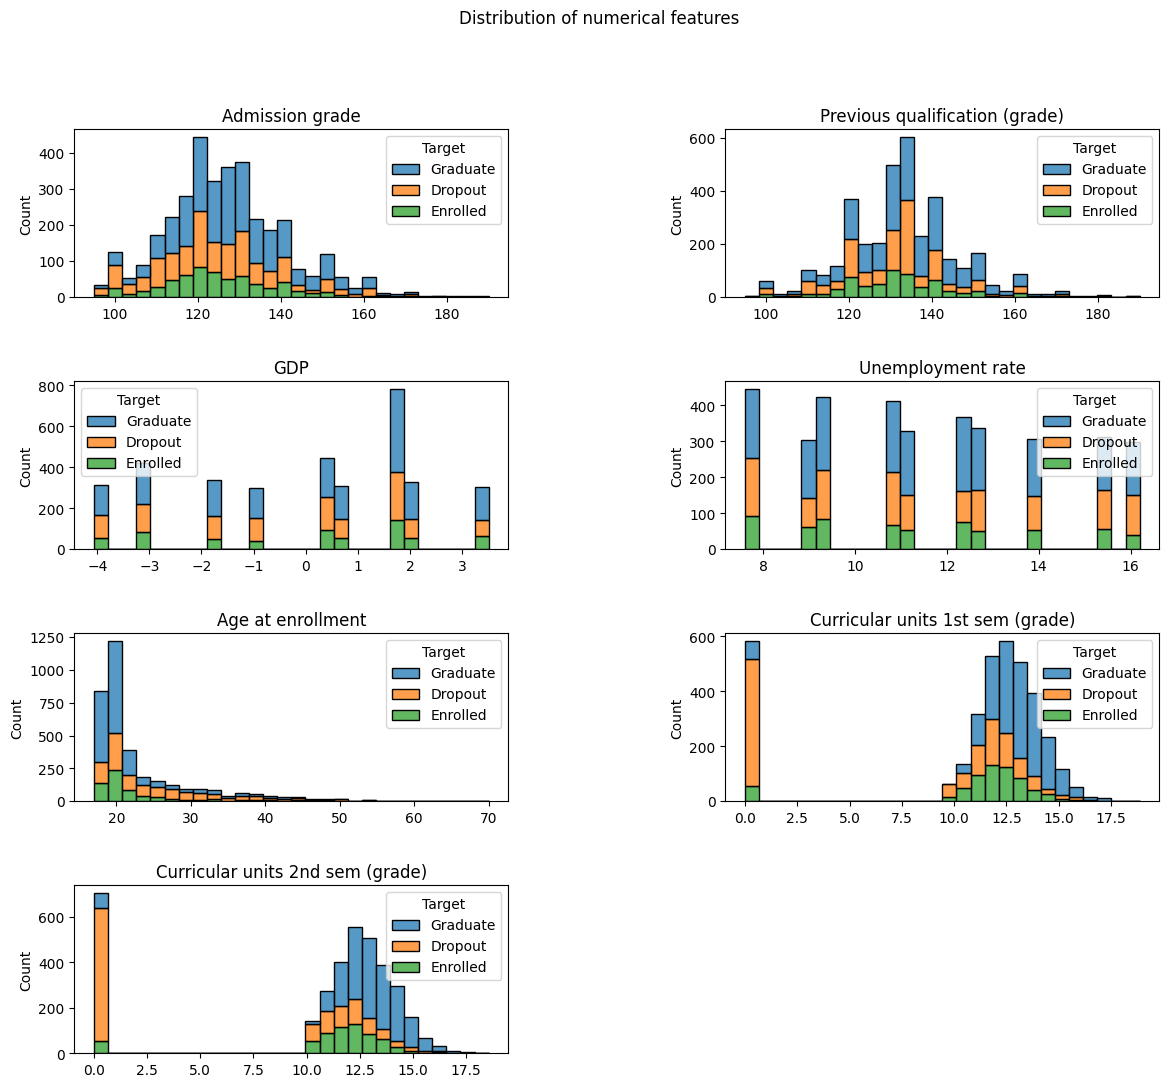

In [77]:
fig = plt.figure(figsize=(14, 12))
for i, feature in enumerate(num_features):
    ax = plt.subplot(4, 2, i+1)
    sns.histplot(data=train, x=feature, hue='Target', multiple = 'stack', bins=28,  ax=ax)
    plt.xlabel('')
    plt.title(feature)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.suptitle("Distribution of numerical features")
plt.show()

Grade being zero in first and 2nd semesters is a strong indicator of dropout